# Problem Set #5

Ariel Boyarsky

aboyarsky@uchicago.edu

a. Use a multinomial logistic regression model of the following form with the
following linear predictor $η_j$ for j = 1, 2 (the baseline class is j = 3).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut, KFold

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dta = pd.read_csv("strongdrink.txt")

In [3]:
dta.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = dta[['alco', 'malic', 'tot_phen', 'color_int']]
y = dta['cultivar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

LR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



In [5]:
LR.coef_

array([[ 1.70040338, -0.26560523,  1.22389373,  0.02275637],
       [-1.46804432, -0.33305312,  0.66401185, -0.92271223],
       [-0.23235907,  0.59865838, -1.88790558,  0.89995595]])

In [6]:
LR.intercept_

array([-24.01098945,  22.8024462 ,   1.20854325])

In [7]:
dta.cultivar.value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [8]:
MSE_vs = ((y_test - y_pred) ** 2).sum() / y_pred.shape[0]
print('Validation set MSE = ', MSE_vs)

Validation set MSE =  0.045454545454545456


Thus, the coefficents for $j=1$ are 1.70, -0.265, 1.22, 0.022. The coefficents for $j=2$ are -1.46, -0.333, 0.664, -0.9227. 

The error rate for $j=1$ is 0.03, for $j=2$ is 0, for $j=3$ is 0. It is best at predicting $j=3$. No, it has the least observations.

b. Perform a leave-one-out cross validation (LOOCV) with the model from
part (a). Report your error rates (1 - precision) for each category? How
do your error rates compare to those from part (a)? Report your LOOCV
estimate for the test MSE as the average MSE, where yi
is the left out
observation from each test set.


In [9]:
X = dta[['alco', 'malic', 'tot_phen', 'color_int']].values
y = dta['cultivar'].values
N = X.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(X)
MSE = np.zeros(N)

In [10]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE[test_index] = (y_test - y_pred) ** 2

In [11]:
MSE_loo = MSE.mean()
MSE_loo_std = MSE.std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.0965909090909 , test estimate MSE standard err= 0.394262505894


In [12]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         1



c. Perform a k-fold cross validation in which the data are divided into k = 4
groups. Use the following code. Report your error rates (1 - precision)
for each category. How do your error rates compare to those from parts
(a) and (b)? Report your k-fold estimate for the test MSE as the average
MSE.

In [13]:
X = dta[['alco', 'malic', 'tot_phen', 'color_int']].values
y = dta['cultivar'].values
k=3
kf = KFold(n_splits=3, shuffle=True, random_state=10)
kf.get_n_splits(X)

3

In [14]:
MSE_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

k index= 0
MSE for test set 0  is 0.118644067797
k index= 1
MSE for test set 1  is 0.101694915254
k index= 2
MSE for test set 2  is 0.0689655172414
test estimate MSE k-fold= 0.0964348334307 test estimate MSE standard err= 0.0206194235598


a. Create a scatterplot of the data with age on the x-axis and Coolness Index
on the y-axis. Label your axes, and give the plot a title.

In [16]:
cool = pd.read_csv("Coolindex.txt", header=None)
cool.columns = ["age", "coolness_index"]
min(cool.age)

11.0

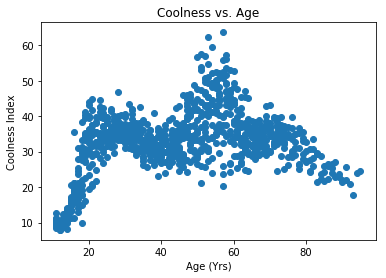

In [108]:
plt.scatter(x=cool.age, y=cool.coolness_index)
plt.xlabel("Age (Yrs)")
plt.ylabel("Coolness Index")
plt.title("Coolness vs. Age")
plt.show()

b.Use ordinary least squares (OLS) regression to fit a stepwise function to
these data. Use 5 bins [11, 22), [22, 40), [40, 59), [59, 77), [77, 95]. Remember
that your dummy variables must be integer type (0, 1), not boolean
type (True, False). Plot this step function on top of the scatterplot of
the data from part (a). Label your axes, include a legend, and give the
plot a title. Report your estimated step function values for each bin
[β1, β2, β3, β4, β5]. What is the predicted coolness of a 73-year old from
the stepwise function?


In [20]:
index = cool['coolness_index']
age = cool['age']
age_bin1 = (age < 22).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
agg_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age < 95)).astype(int)

In [21]:
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.describe()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.162134,0.276151,0.217573,0.217573,0.057531
std,0.368767,0.447326,0.412812,0.412812,0.232977
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
reg = sm.OLS(endog=wage, exog=X_step, missing='drop')
reg_results = reg2.fit()
print(reg2_results.summary())

# References
Evans, Rick. Resampling Methods (MACS 30100). Feburary, 2018. https://github.com/UC-MACSS/persp-model_W18/blob/master/Notebooks/Resampling/Resampling.ipynb.